In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
import pydotplus
import io
from scipy import misc
import graphviz
from sklearn import metrics
from sklearn import preprocessing

In [2]:
features=["Gender","Married","Dependents","Education","Self_Employed","ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History","Property_Area"]
features_pruned=["Gender","Married","Dependents","Education","Self_Employed","ApplicantIncome","CoapplicantIncome","LoanAmount","Credit_History","Property_Area"]

In [3]:
data=pd.read_csv('Data Sets/DataSet.csv')

## Data in its raw form

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,11,0,2,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,8,5,8,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,4,0,2,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,3,10,7,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,11,0,10,360,1,Urban,Y


## Encoding Columns changing string values into numeric values

#### Columns "Applicant Income","CoapplicantIncome" and "Loan Amount" have been pre-classified into categorized as 0-n

In [5]:
loan_encoder = preprocessing.LabelEncoder()
data['Gender'] = loan_encoder.fit_transform(data['Gender'])
data['Married'] = loan_encoder.fit_transform(data['Married'])
data['Dependents']=loan_encoder.fit_transform(data['Dependents'])
data['Education'] = loan_encoder.fit_transform(data['Education'])
data['Self_Employed'] = loan_encoder.fit_transform(data['Self_Employed'])
data['Property_Area'] = loan_encoder.fit_transform(data['Property_Area'])
data['Loan_Status'] = loan_encoder.fit_transform(data['Loan_Status'])
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,11,0,2,360,1,2,1
1,LP001003,1,1,1,0,0,8,5,8,360,1,0,0
2,LP001005,1,1,0,0,1,4,0,2,360,1,2,1
3,LP001006,1,1,0,1,0,3,10,7,360,1,2,1
4,LP001008,1,0,0,0,0,11,0,10,360,1,2,1


### Dividing Data into Training and testing data

In [6]:
train, test = train_test_split(data, test_size = 0.15)
print("Training Data Size: {}; Test Size: {}".format(len(train),len(test)))

Training Data Size: 521; Test Size: 93


### Graphs to Show data distribution

In [7]:
red_green = ["#B81324","#93DB70"]
palette = sns.color_palette(red_green)
sns.set_palette(palette)
sns.set_style("white")

In [8]:
LoanYes_Gender=data[data['Loan_Status'] == 1]['Gender']
LoanNo_Gender=data[data['Loan_Status'] == 0]['Gender']

LoanYes_Married=data[data['Loan_Status'] == 1]['Married']
LoanNo_Married=data[data['Loan_Status'] == 0]['Married']

LoanYes_Dependents=data[data['Loan_Status'] == 1]['Dependents']
LoanNo_Dependents=data[data['Loan_Status'] == 0]['Dependents']

LoanYes_Education=data[data['Loan_Status'] == 1]['Education']
LoanNo_Education=data[data['Loan_Status'] == 0]['Education']

LoanYes_Self_Employed=data[data['Loan_Status'] == 1]['Self_Employed']
LoanNo_Self_Employed=data[data['Loan_Status'] == 0]['Self_Employed']

LoanYes_ApplicantIncome=data[data['Loan_Status'] == 1]['ApplicantIncome']
LoanNo_ApplicantIncome=data[data['Loan_Status'] == 0]['ApplicantIncome']

LoanYes_CoapplicantIncome=data[data['Loan_Status'] == 1]['CoapplicantIncome']
LoanNo_CoapplicantIncome=data[data['Loan_Status'] == 0]['CoapplicantIncome']

LoanYes_LoanAmount=data[data['Loan_Status'] == 1]['LoanAmount']
LoanNo_LoanAmount=data[data['Loan_Status'] == 0]['LoanAmount']

LoanYes_Loan_Amount_Term=data[data['Loan_Status'] == 1]['Loan_Amount_Term']
LoanNo_Loan_Amount_Term=data[data['Loan_Status'] == 0]['Loan_Amount_Term']

LoanYes_Credit_History=data[data['Loan_Status'] == 1]['Credit_History']
LoanNo_Credit_History=data[data['Loan_Status'] == 0]['Credit_History']

LoanYes_Property_Area=data[data['Loan_Status'] == 1]['Property_Area']
LoanNo_Property_Area=data[data['Loan_Status'] == 0]['Property_Area']

H:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
H:\Anaconda\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


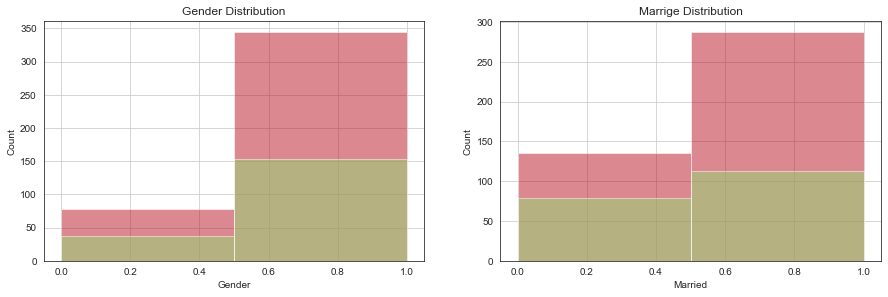

In [9]:
fig1 = plt.figure(figsize=(15,15))

ax1 = fig1.add_subplot(321)
ax1.set_xlabel('Gender')
ax1.set_ylabel('Count')
ax1.set_title('Gender Distribution')
LoanYes_Gender.hist(alpha = 0.5,bins=2)
ax2 = fig1.add_subplot(321)
LoanNo_Gender.hist(alpha = 0.5,bins=2)

ax3 = fig1.add_subplot(322)
ax3.set_xlabel('Married')
ax3.set_ylabel('Count')
ax3.set_title('Marrige Distribution')
LoanYes_Married.hist(alpha = 0.5,bins=2)
ax4 = fig1.add_subplot(322)
LoanNo_Married.hist(alpha = 0.5,bins=2)

H:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
H:\Anaconda\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
H:\Anaconda\lib\site-packages\ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future versi

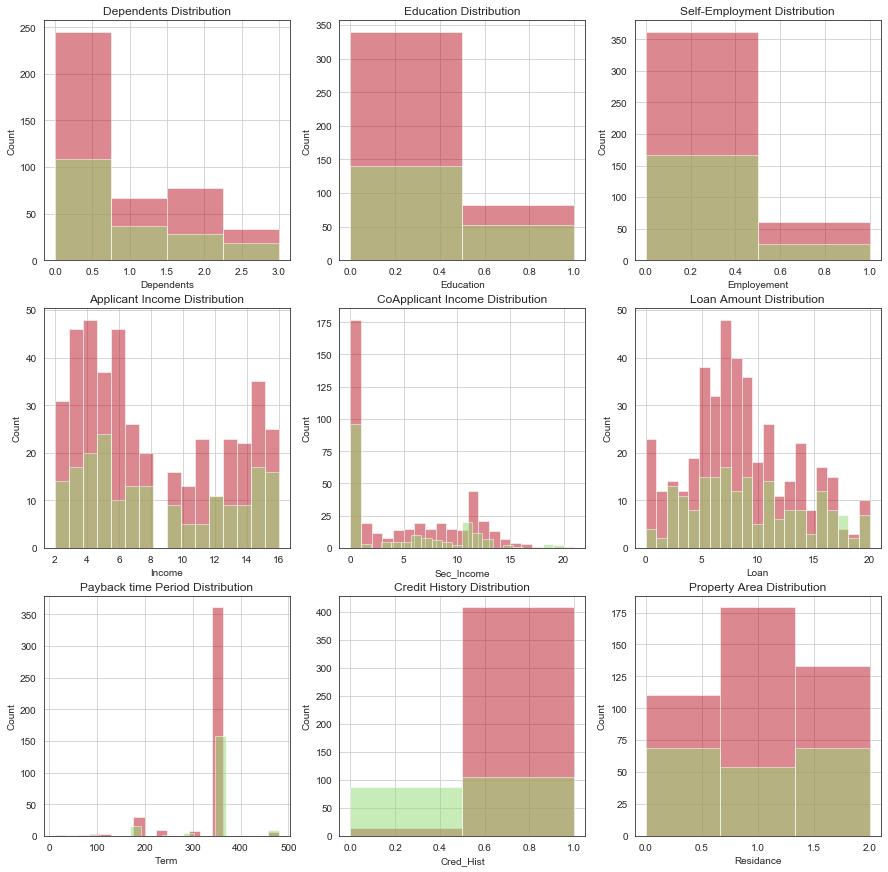

In [10]:
fig2 = plt.figure(figsize=(15,15))

ax5 = fig2.add_subplot(331)
ax5.set_xlabel('Dependents')
ax5.set_ylabel('Count')
ax5.set_title('Dependents Distribution')
LoanYes_Dependents.hist(alpha = 0.5,bins=4)
ax6 = fig2.add_subplot(331)
LoanNo_Dependents.hist(alpha = 0.5,bins=4)

ax7 = fig2.add_subplot(332)
ax7.set_xlabel('Education')
ax7.set_ylabel('Count')
ax7.set_title('Education Distribution')
LoanYes_Education.hist(alpha = 0.5,bins=2)
ax8 = fig2.add_subplot(332)
LoanNo_Education.hist(alpha = 0.5,bins=2)

ax9 = fig2.add_subplot(333)
ax9.set_xlabel('Employement')
ax9.set_ylabel('Count')
ax9.set_title('Self-Employment Distribution')
LoanYes_Self_Employed.hist(alpha = 0.5,bins=2)
ax10 = fig2.add_subplot(333)
LoanNo_Self_Employed.hist(alpha = 0.5,bins=2)

ax11 = fig2.add_subplot(334)
ax11.set_xlabel('Income')
ax11.set_ylabel('Count')
ax11.set_title('Applicant Income Distribution')
LoanYes_ApplicantIncome.hist(alpha = 0.5,bins=16)
ax12 = fig2.add_subplot(334)
LoanNo_ApplicantIncome.hist(alpha = 0.5,bins=16)

ax13 = fig2.add_subplot(335)
ax13.set_xlabel('Sec_Income')
ax13.set_ylabel('Count')
ax13.set_title('CoApplicant Income Distribution')
LoanYes_CoapplicantIncome.hist(alpha = 0.5,bins=21)
ax14 = fig2.add_subplot(335)
LoanNo_CoapplicantIncome.hist(alpha = 0.5,bins=21)

ax15 = fig2.add_subplot(336)
ax15.set_xlabel('Loan')
ax15.set_ylabel('Count')
ax15.set_title('Loan Amount Distribution')
LoanYes_LoanAmount.hist(alpha = 0.5,bins=21)
ax16 = fig2.add_subplot(336)
LoanNo_LoanAmount.hist(alpha = 0.5,bins=21)

ax17 = fig2.add_subplot(337)
ax17.set_xlabel('Term')
ax17.set_ylabel('Count')
ax17.set_title('Payback time Period Distribution')
LoanYes_Loan_Amount_Term.hist(alpha = 0.5,bins=20)
ax18 = fig2.add_subplot(337)
LoanNo_Loan_Amount_Term.hist(alpha = 0.5,bins=20)

ax19 = fig2.add_subplot(338)
ax19.set_xlabel('Cred_Hist')
ax19.set_ylabel('Count')
ax19.set_title('Credit History Distribution')
LoanYes_Credit_History.hist(alpha = 0.5,bins=2)
ax20 = fig2.add_subplot(338)
LoanNo_Credit_History.hist(alpha = 0.5,bins=2)

ax21 = fig2.add_subplot(339)
ax21.set_xlabel('Residance')
ax21.set_ylabel('Count')
ax21.set_title('Property Area Distribution')
LoanYes_Property_Area.hist(alpha = 0.5,bins=3)
ax22 = fig2.add_subplot(339)
LoanNo_Property_Area.hist(alpha = 0.5,bins=3)

In [11]:
myclassifier=DecisionTreeClassifier(min_samples_split=100)
x_train = train[features]
y_train = train["Loan_Status"]

x_test = test[features]
y_test = test["Loan_Status"]

In [12]:
dt=myclassifier.fit(x_train,y_train)
dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [13]:
X = data[features]
y = data.Loan_Status
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3,random_state=100)
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [14]:
Accuracy_gini=metrics.accuracy_score(y_test,y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7189189189189189


In [15]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [16]:
import imageio
def show_tree(tree,features,path):
    f=io.StringIO()
    export_graphviz(tree, out_file=f,feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img=imageio.imread(path)
    plt.rcParams["figure.figsize"]=(20,20)
    plt.imshow(img)

In [17]:
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

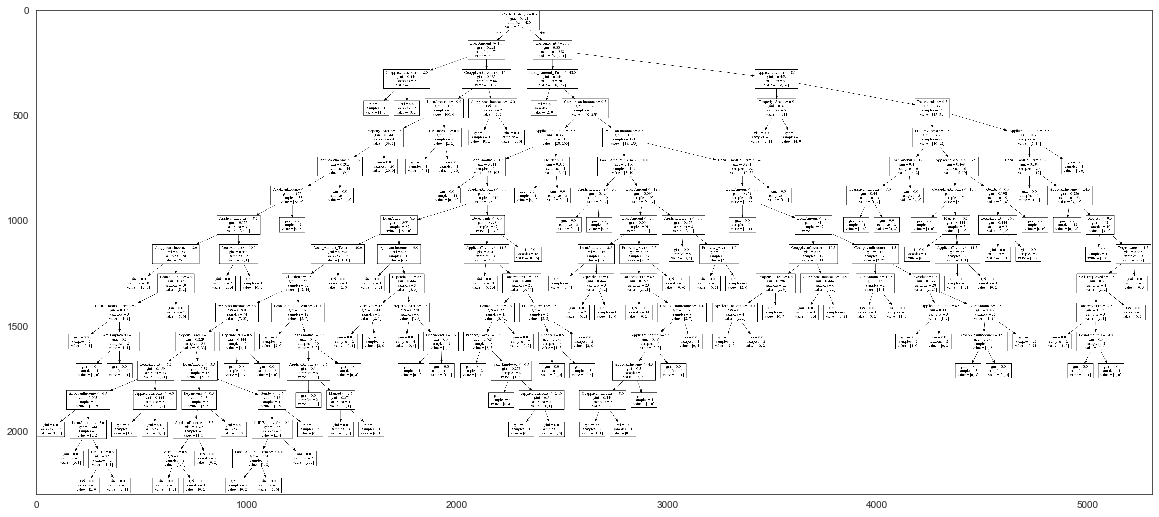

In [18]:
show_tree(clf,features,"dec_tree_gini.png")

In [19]:
clf1=DecisionTreeClassifier(criterion='entropy',max_depth=None)
clf1 = clf1.fit(X_train,y_train)
clf1

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

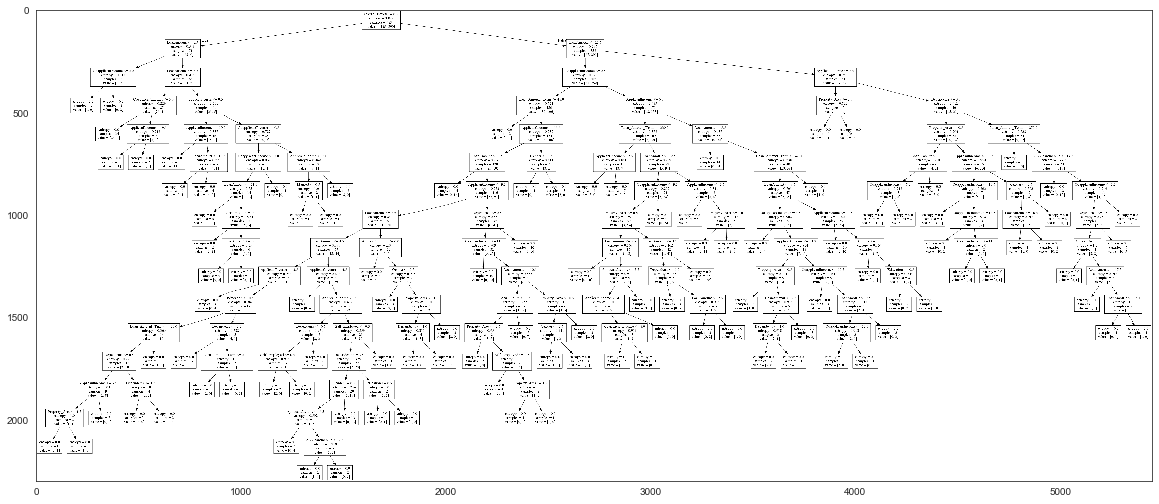

In [20]:
show_tree(clf1,features,"dec_tree_entropy.png")

In [21]:
Accuracy_entropy=metrics.accuracy_score(y_test,y_pred)
print('Accuracy = ', metrics.accuracy_score(y_test,y_pred))

Accuracy =  0.7189189189189189


In [22]:
print('Accuracy with entropy = ', Accuracy_entropy)
print('Accuracy with gini = ', Accuracy_gini)

Accuracy with entropy =  0.7189189189189189
Accuracy with gini =  0.7189189189189189


In [23]:
X_prune = data[features_pruned]
y_prune = data.Loan_Status
X_train1,X_test1,y_train1,y_test1 = train_test_split(X_prune, y_prune, test_size=0.3,random_state=100)
clf = DecisionTreeClassifier()
clf = clf.fit(X_train1,y_train1)
y_pred = clf.predict(X_test1)

In [24]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [25]:
Accuracy_entropy=metrics.accuracy_score(y_test1,y_pred)
print('Accuracy after pruning with entropy = ', Accuracy_entropy)

Accuracy after pruning with entropy =  0.7081081081081081


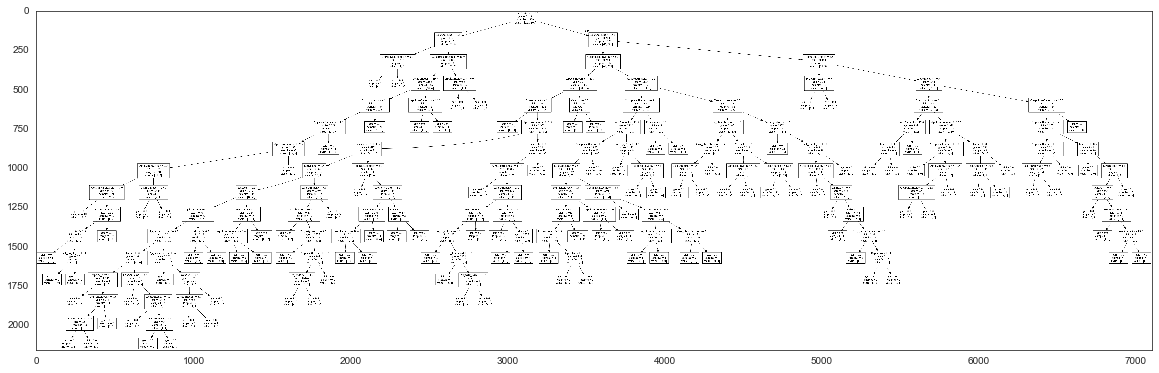

In [27]:
show_tree(clf,features_pruned,"dec_tree_gini_pruned.png")